In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('D:\MS EBDE\Tests techniques\Test technique Porsolt\\data2.xlsx')
data.head()

Entreprise               Metier  \
0                                             Sanofi       Data scientist   
1                Massachusetts General Hospital(MGH)      Data architecte   
2                                              Delve  Lead data scientist   
3  Ann & Robert H. Lurie Children’s Hospital of C...       Data scientist   
4                                                Arm       Data scientist   

                                        Technologies Diplome  Experience  \
0      Matlab/Python/Pyspark/Scikit-learn/Tensorflow  Master         1.0   
1                          Python/Java/Scala/MongoDB  Master         3.0   
2  SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...  Master         3.0   
3                                  C/C++/Java/Python  Master         1.5   
4    Matlab/Python/C++/numpy/Tensorflow/scikit-learn     Phd         NaN   

       Ville  
0      Paris  
1  Marseille  
2     Nantes  
3  Marseille  
4   Bordeaux

In [7]:
#1) Combien y a-t-il d'observations dans ce dataset? 

data.shape    

#conclusion : on a 9582 observations et 6 variables

(9582, 6)

In [3]:
#1) Y a-t-il des valeurs manquantes ?

# le pourcentage de manquants par variable
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

#conclusion : on a des des données manquantes dans 3 variables (Metier, Entreprise et Experience)

Technologies    0.000000
Diplome         0.000000
Ville           0.000000
Entreprise      0.001774
Metier          0.001983
Experience      0.009810
dtype: float64

<AxesSubplot:>

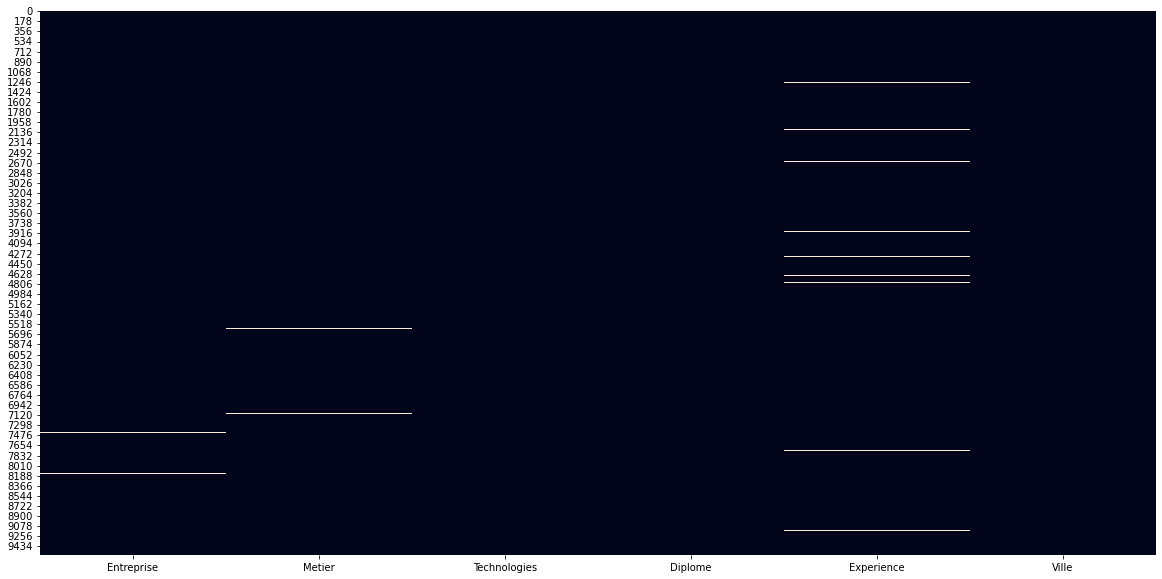

In [5]:
#1)  Y a-t-il des valeurs manquantes ?

# une visualisation graphique des données manquantes
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

In [23]:
#2) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec :

#avant de realiser l'imputation, nous allons connaitre le type de chaque variable

data.dtypes

Entreprise      object
Metier          object
Technologies    object
Diplome         object
Experience      object
Ville           object
dtype: object

In [48]:
#transformer le type "object" de la variable "Experience" en "float" avant de faire les calculs de moyennes et de medianes

data['Experience'] = data['Experience'].astype(float, errors = 'raise')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Entreprise    9565 non-null   object 
 1   Metier        9563 non-null   object 
 2   Technologies  9582 non-null   object 
 3   Diplome       9582 non-null   object 
 4   Experience    9488 non-null   float64
 5   Ville         9582 non-null   object 
dtypes: float64(1), object(5)
memory usage: 449.3+ KB
None


In [80]:
# a. la valeur médiane pour les data scientists

median_data = data[['Metier','Experience']]

median_data = median_data[median_data['Metier']=='Data scientist']

median_ds = median_data['Experience'].median(axis=0)

median_data['Experience'].replace(np.nan, median_ds, inplace= True)

median_data.head()

Metier  Experience
0     Data scientist         1.0
3     Data scientist         1.5
4     Data scientist         2.0
6     Data scientist         0.0
7     Data scientist         4.0
...              ...         ...
9577  Data scientist         1.5
9578  Data scientist        11.0
9579  Data scientist         1.0
9580  Data scientist        17.0
9581  Data scientist         0.0

[3865 rows x 2 columns]

In [81]:
# b. la valeur moyenne pour les data engineers

mean_data = data[['Metier','Experience']]

mean_data = mean_data[mean_data['Metier']=='Data engineer']

mean_de = mean_data['Experience'].mean(axis=0)

mean_data['Experience'].replace(np.nan, mean_de, inplace= True)

mean_data.head()

Metier  Experience
9     Data engineer         5.0
10    Data engineer         0.5
15    Data engineer         3.0
18    Data engineer         3.0
19    Data engineer         8.0
...             ...         ...
9564  Data engineer         0.0
9565  Data engineer         4.0
9569  Data engineer         0.5
9570  Data engineer         2.0
9575  Data engineer         4.0

[2347 rows x 2 columns]

In [ ]:
# La question 2 peut aussi etre traité par la methode SimpleImputer du package scikit learn
from sklearn.impute import SimpleImputer

In [7]:
# 3) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le
# lead data scientist et le data engineer en moyenne ?

data['Metier'].value_counts()

Data scientist         3865
Data engineer          2347
Data architecte        2123
Lead data scientist    1228
Name: Metier, dtype: int64

In [8]:
data.loc[data.loc[:, 'Metier']=='Data scientist', 'Experience'].mean()

# conclusion : la moyenne d'experience chez les Data scientists est d'environ 2 ans

2.2432820245238716

In [9]:
data.loc[data.loc[:, 'Metier']=='Lead data scientist', 'Experience'].mean()

# conclusion : la moyenne d'experience chez les Lead data scientists est d'environ 4 ans

3.965260545905707

In [10]:
data.loc[data.loc[:, 'Metier']=='Data engineer', 'Experience'].mean()

# conclusion : la moyenne d'experience chez les data engineers est d'environ 3 ans

2.984959174903309

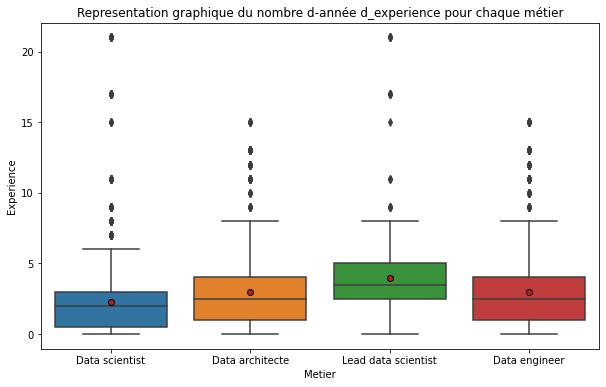

In [32]:
# 4) Faire la représentation graphique de votre choix afin de comparer le nombre moyen
# d'années d'expériences pour chaque métier

plt.figure(figsize=(10, 6))  
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'} 
sns.boxplot(x='Metier', y='Experience', data=data, showmeans=True, meanprops=meanprops)
plt.title('Representation graphique du nombre d_année d_experience pour chaque métier')
plt.show()


# conclusion : Les Lead data scientists ont plus de nombre moyen d'années d'experiences et c'est tout à fait logique

In [31]:
# 5) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle
# 'Exp_label' à 4 modalités : débutant, confirmé, avancé et expert.
# Veuillez expliquer votre choix de la règle de transformation.

data['Experience'].value_counts()

#le nombre d'année d'experience tout metier confondu va de 0 à 21 ans

1.5     1023
1.0      996
2.0      976
0.5      916
3.5      905
0.0      899
2.5      876
3.0      723
4.0      582
5.0      490
6.0      297
7.0      286
8.0      200
11.0      65
9.0       56
13.0      52
12.0      37
15.0      35
17.0      26
21.0      26
10.0      22
Name: Experience, dtype: int64

In [6]:
# choix de ma transformation : 0 à 5 ans d'experience pour niveau debutant, 5 à 10 ans d'experience pour niveau confirmé,
                             # 10 à 15 d'expérience pour niveau avancé, 15 à 21 ans d'experience pour niveau expert

def category(x):
    if x>=0 and x<5:
        return 'débutant'
    elif x>=5 and x<10:
        return 'confirmé'
    elif x>=10 and x<15:
        return 'avancé'
    elif x>=15 and x<=21:
        return 'expert'

data['Exp_label'] = data['Experience'].apply(category)

data['Exp_label'].value_counts()


débutant    7896
confirmé    1329
avancé       176
expert        87
Name: Exp_label, dtype: int64

C:\Users\laura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


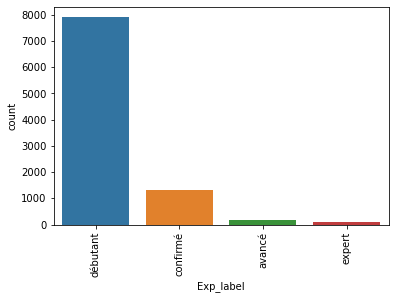

In [47]:
sns.countplot(data['Exp_label'])
plt.xticks(rotation = 'vertical')
plt.show()


# avec ce choix de transformation, on remarque que notre base de données contient essentiellement le niveau débutant

In [51]:
# 6) Quelles sont les 5 technologies les plus utilisées ? 

data['Technologies'].value_counts()

# les 5 technologies les plus utilisés sont :

# SQL/R/Python//Big data                                
# SAS/Teradata/SQL/R/Python/Machine learning/Anglais    
# C++/R/Python/Matlab/Matplotlib                       
# Hadoop/Hive/Vertica/Tableau                          
# SPSS/Excel/SAS/R/machine learning/AI/Scoring 

SQL/R/Python//Big data                                539
SAS/Teradata/SQL/R/Python/Machine learning/Anglais    458
C++/R/Python/Matlab/Matplotlib                        273
Hadoop/Hive/Vertica/Tableau                           250
SPSS/Excel/SAS/R/machine learning/AI/Scoring          250
Python/Tensorflow/R/Big data                          241
R/Python/Spark/Pycharm/SAS/SQL                        235
Python/Hadoop/Kafka/AWS                               235
Python/R/machine learning/Excel/VBA/C++               229
R/machine learning/Excel/VBA                          227
Python/Tensorflow/scikit-learn/Deep learning/R        227
C/C++/Java/Python                                     222
R/Python/Hadoop/Hive/SQL                              213
Python/R/Spark/Hadoop/SQL                             210
Excel/VBA/R                                           210
Docker/PostgreSQL/Elasticsearch/Kibana/MongoDB        208
Elasticsearch/Kibana/MongoDB                          206
Java/Hadoop/HD

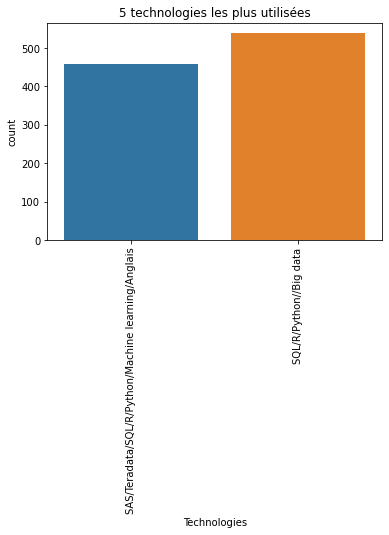

In [64]:
# Faites un graphique

data2 = data.loc[data["Technologies"].isin(["SQL/R/Python//Big data",
                                            "SAS/Teradata/SQL/R/Python/Machine learning/Anglais",
                                            "C++/R/Python/Matlab/Matplotlib",
                                            "Hadoop/Hive/Vertica/Tableau",
                                            "SPSS/Excel/SAS/R/machine learning/AI/Scoring"]),:]

sns.countplot(x='Technologies', data=data2)
plt.title("5 technologies les plus utilisées")
plt.xticks(rotation = 'vertical')
plt.show()

In [8]:
# 7) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître le
# nombre de clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des
# clusters.

#realisation de la methode de K-means

from sklearn.preprocessing import LabelEncoder

# L'algorithme k-means standard n'est pas directement applicable aux données catégorielles 
# L'espace échantillon pour les données catégorielles est discret et 
# n'a pas d'origine naturelle. Une fonction de distance euclidienne sur un tel espace n'a pas vraiment de sens. 


le = LabelEncoder()
data['Entreprise'] = le.fit_transform(data['Entreprise'])
data['Metier'] = le.fit_transform(data['Metier'])
data['Technologies'] = le.fit_transform(data['Technologies'])
data['Diplome'] = le.fit_transform(data['Diplome'])
data['Experience'] = le.fit_transform(data['Experience'])
data['Ville'] = le.fit_transform(data['Ville'])
data['Exp_label'] = le.fit_transform(data['Exp_label'])
data

Entreprise  Metier  Technologies  Diplome  Experience  Ville  Exp_label
0           1075       2            27        1           2      8          2
1            797       0            34        1           6      4          2
2            401       3            51        1           6      6          2
3             99       2             2        1           3      4          2
4            120       2            26        3          21      0          4
...          ...     ...           ...      ...         ...    ...        ...
9577         797       2             1        1           3      3          2
9578         284       2             9        1          15     13          0
9579         157       2            48        1           2      8          2
9580        1177       2            37        1          19      9          3
9581        1300       2            56        3           0      8          2

[9582 rows x 7 columns]

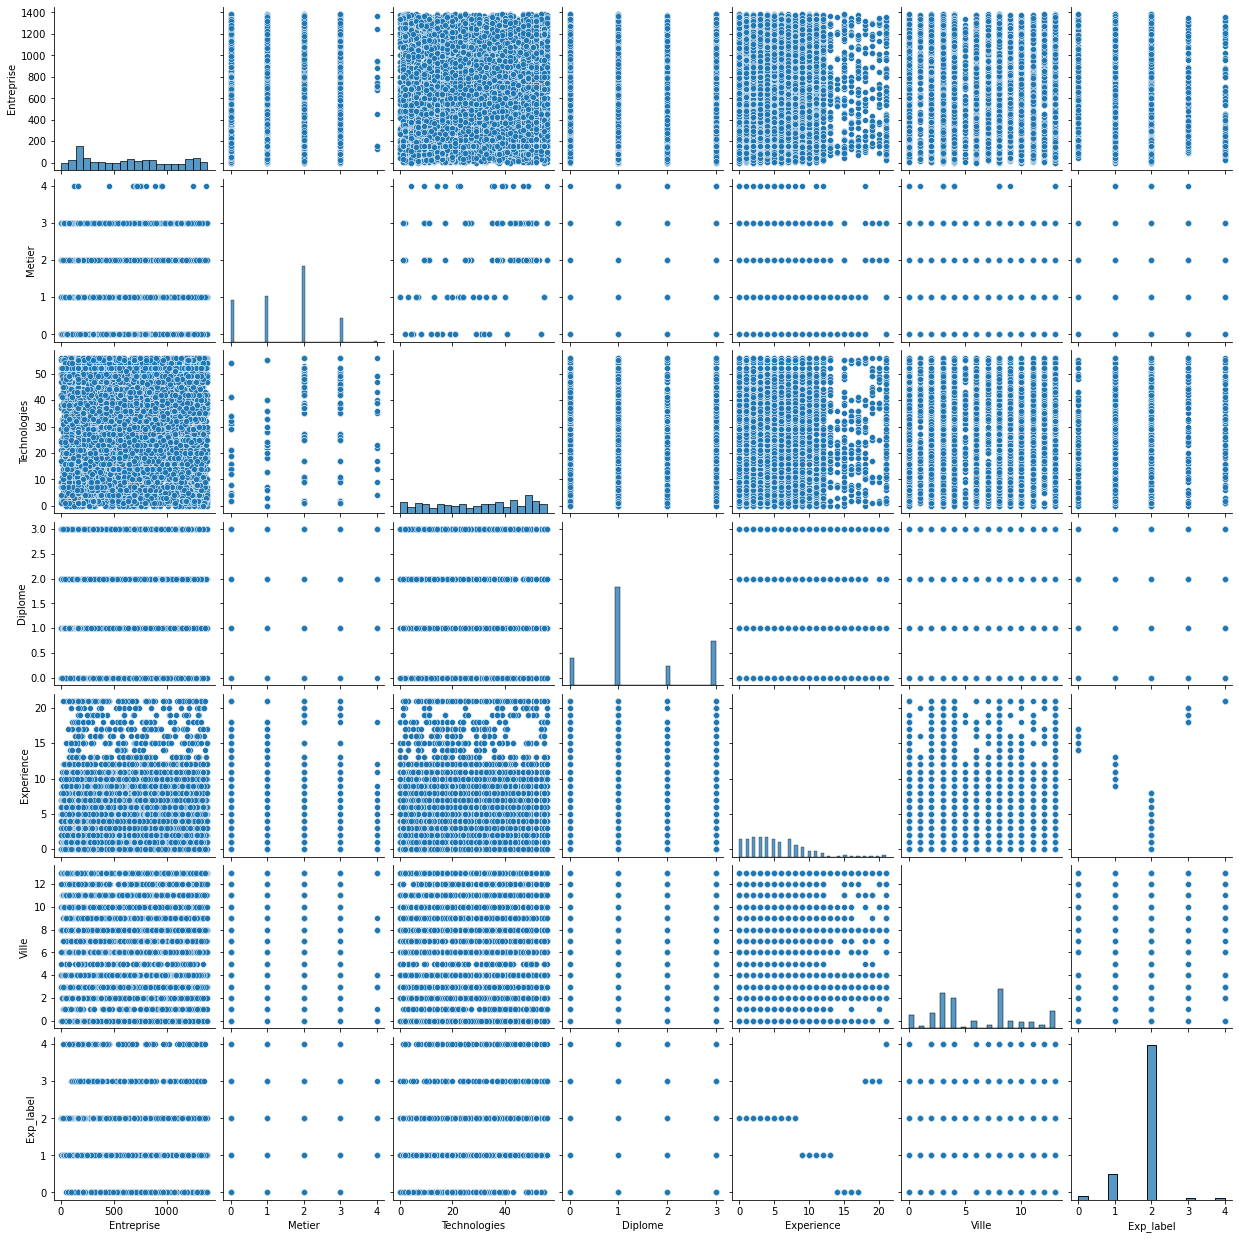

In [93]:
sns.pairplot(data)   

# on voit clairement qu'il n'y a pas de clusters 

In [96]:
#on pourra standardiser la donnée
Z = (data - data.mean(axis=0))/data3.std(axis=0)
print(Z)

      Entreprise    Metier  Technologies   Diplome  Experience     Ville  \
0       1.048776  0.567904     -0.173041 -0.424937   -0.776468  0.557949   
1       0.375941 -1.475142      0.239885 -0.424937    0.200663 -0.505456   
2      -0.582485  1.589427      1.242706 -0.424937    0.200663  0.026247   
3      -1.313405  0.567904     -1.647777 -0.424937   -0.532186 -0.505456   
4      -1.262580  0.567904     -0.232030  1.568573    3.864904 -1.568861   
...          ...       ...           ...       ...         ...       ...   
9577    0.375941  0.567904     -1.706766 -0.424937   -0.532186 -0.771307   
9578   -0.865656  0.567904     -1.234851 -0.424937    2.399208  1.887205   
9579   -1.173030  0.567904      1.065738 -0.424937   -0.776468  0.557949   
9580    1.295643  0.567904      0.416854 -0.424937    3.376339  0.823800   
9581    1.593336  0.567904      1.537653  1.568573   -1.265034  0.557949   

      Exp_label  
0      0.300155  
1      0.300155  
2      0.300155  
3      0.300155

In [106]:
from sklearn.cluster import KMeans
from sklearn import cluster 

model = cluster.KMeans(n_clusters=2)
model.fit(Z)


KMeans(n_clusters=2)

In [107]:
model.labels_


array([0, 0, 0, ..., 0, 0, 0])

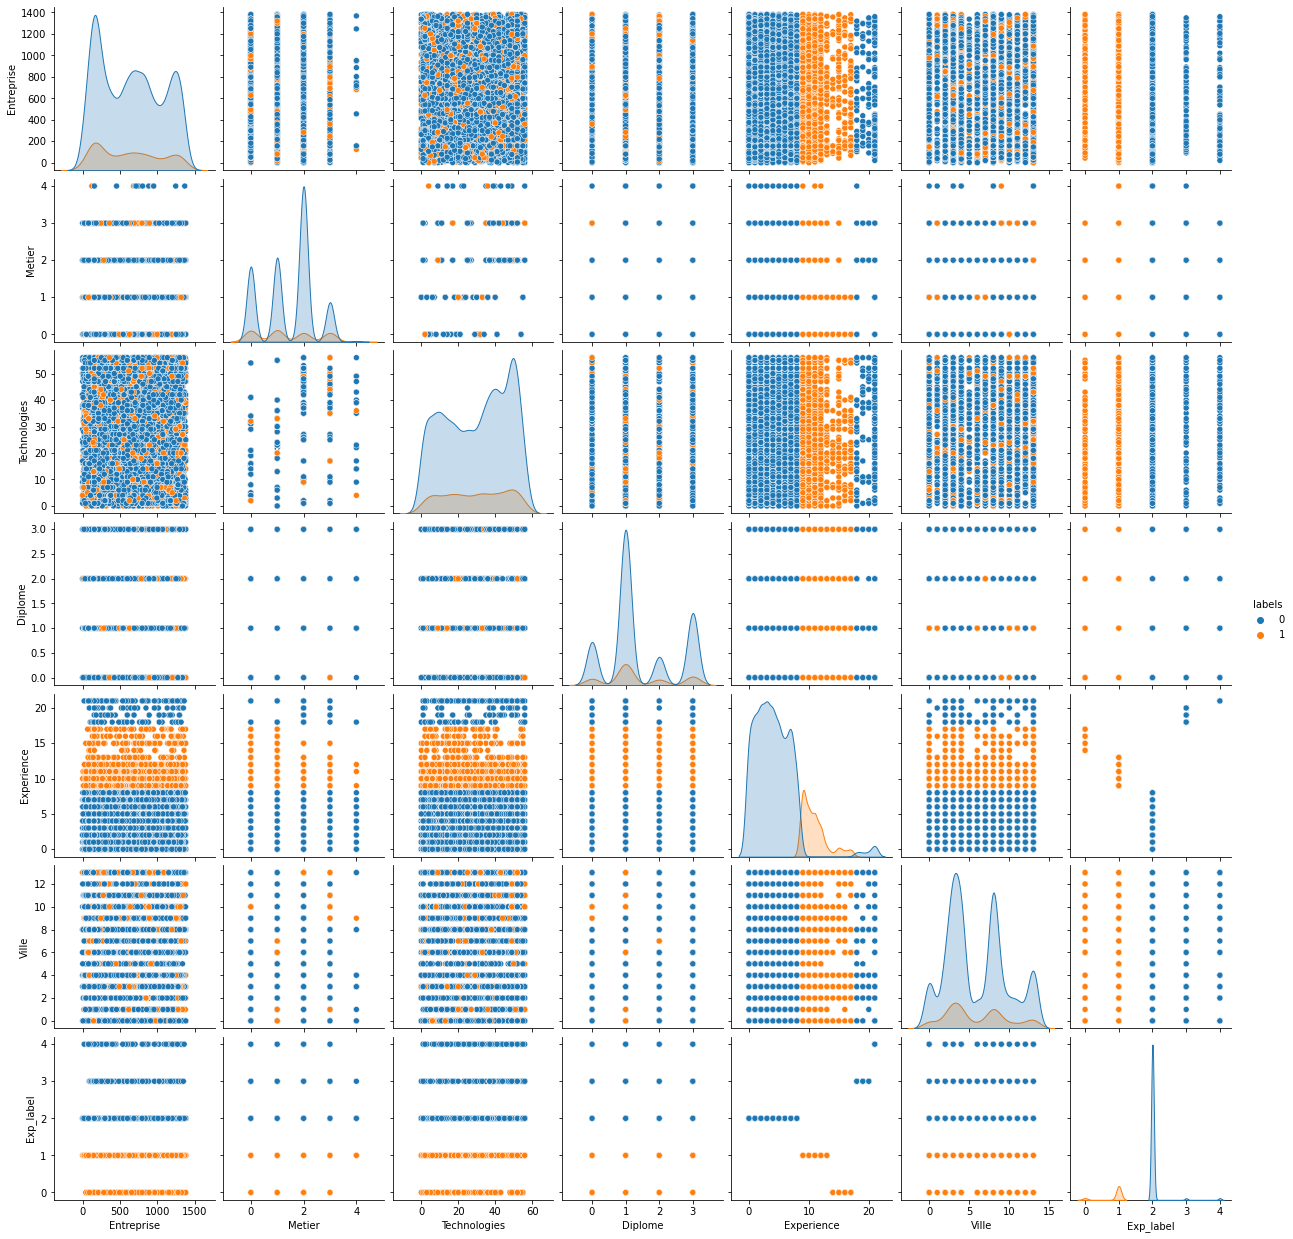

In [108]:
df = data.copy()
df['labels'] = model.labels_
sns.pairplot(df, hue='labels')  

Text(0, 0.5, 'Cout du modele (Inertia)')

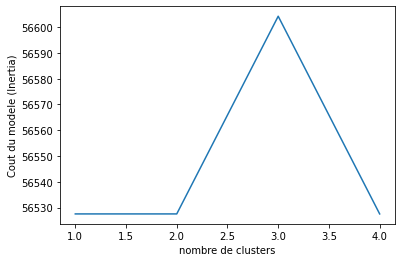

In [114]:
inertia = []
K_range = range(1, 5)
for k in K_range:
    model = KMeans(n_clusters=2).fit(Z)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

# il n'ya pas de clusters 


In [22]:
# pour ameliorer la performance, il faut choisir le meilleur modele pour notre dataset

df = data.copy()

from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

def preprocessing(df):
    
    X = df.drop('Experience', axis=1)
    y = df['Experience']
    
    print(y.value_counts())
    
    return X, y

X_train, y_train = preprocessing(trainset)

X_test, y_test = preprocessing(testset)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

    N, train_score, val_score = lear<ning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))   
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
 


In [23]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0)) #on choisit 4 modeles
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

dict_of_models = {'RandomForest': RandomForest,  # algo de bagging
                  'AdaBoost' : AdaBoost,         # algo de boosting
                  'SVM': SVM,
                  'KNN': KNN
                 }


# ces algorithmes d'apprentissage supervisé n'ont pas reellement permis de repondre à la problématique.
# il faut prevoir une methode de Deep Learning

In [ ]:
# 8) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix